# Feature vs Target Correlation Analysis (Correlation Matrix)

Trying to determine any patterns and correlation between our features and target variable by visualizing the distributions

In [8]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [ ]:
df = pd.read_csv('../flight-delay-dataset.csv')
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,Humidity,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,124,636,324,448,48,34,58,...,False,False,False,False,False,False,False,False,False,False
1,11,1,5,371,2475,340,531,48,34,58,...,False,False,False,False,False,False,False,False,False,False
2,11,1,5,181,1069,301,482,48,34,58,...,False,False,False,False,False,False,False,False,False,False
3,11,1,5,168,944,345,513,48,34,58,...,False,False,False,False,False,False,False,False,False,False
4,11,1,5,139,760,360,499,46,32,58,...,False,False,False,False,False,False,False,False,False,False


### Filtering Dataset

In [ ]:
# Remove all values beyond 3 standard deviations from the mean
mean_dep_delay = df['DEP_DELAY'].mean()
std_dep_delay = df['DEP_DELAY'].std()
upper_bound = mean_dep_delay + (3 * std_dep_delay)

df = df[df['DEP_DELAY'] <= upper_bound]

In [11]:
# Considering any flight is delay after 15 minutes
df = df[df['DEP_DELAY'] >= 15]

# Filtering df with Features Outiler Requirments (From training_feature_analysis)
df = df[df['CRS_ELAPSED_TIME'] < 600]
df = df[df['DISTANCE'] < 4000]
df = df[df['CRS_ARR_M'] > 400]

In [12]:
df['DEP_DELAY']

2        40
36       29
64       37
73       38
95       21
         ..
28716    19
28742    15
28766    15
28793    29
28798    28
Name: DEP_DELAY, Length: 2194, dtype: int64

### Correlation Graphs

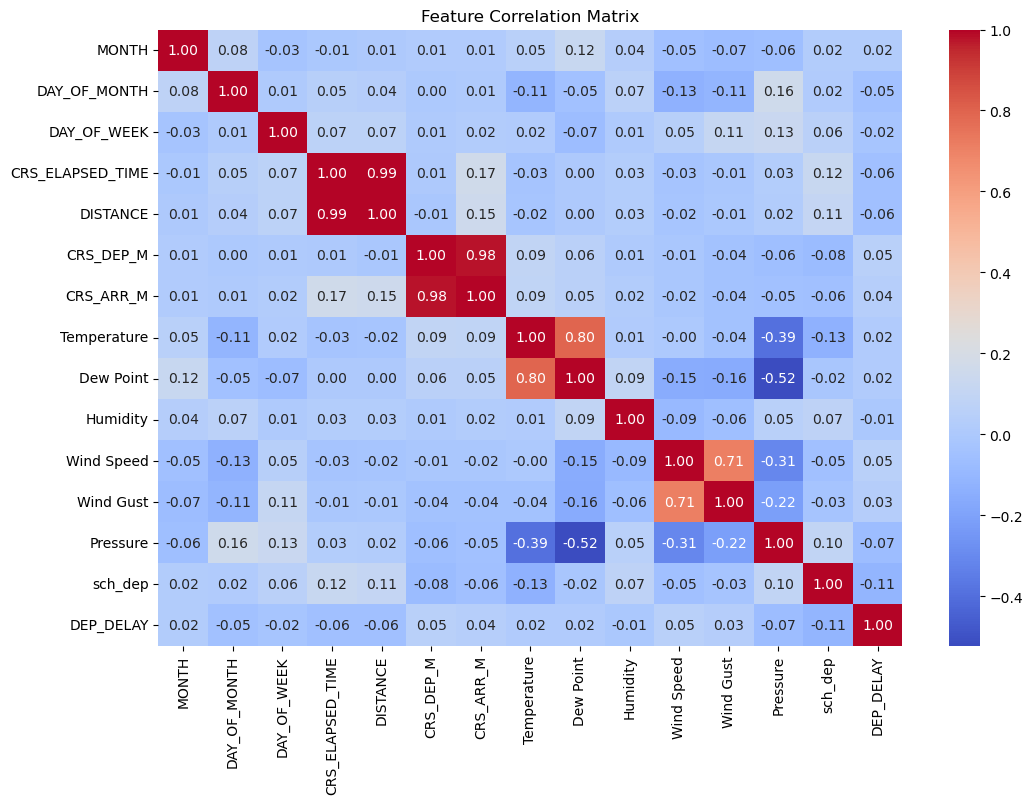

Highly correlated features with target: []


In [13]:
df1 = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'CRS_DEP_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity','Wind Speed', 
       'Wind Gust', 'Pressure', 'sch_dep', 'DEP_DELAY']]

# Compute Pearson correlation
corr_matrix = df1.corr()

# Visualize correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Selecting highly correlated features (absolute value > 0.7)
threshold = 0.7
high_corr_features = corr_matrix[abs(corr_matrix['DEP_DELAY']) > threshold]['DEP_DELAY'].index.tolist()
high_corr_features.remove('DEP_DELAY')  # Remove the target itself
print("Highly correlated features with target:", high_corr_features)


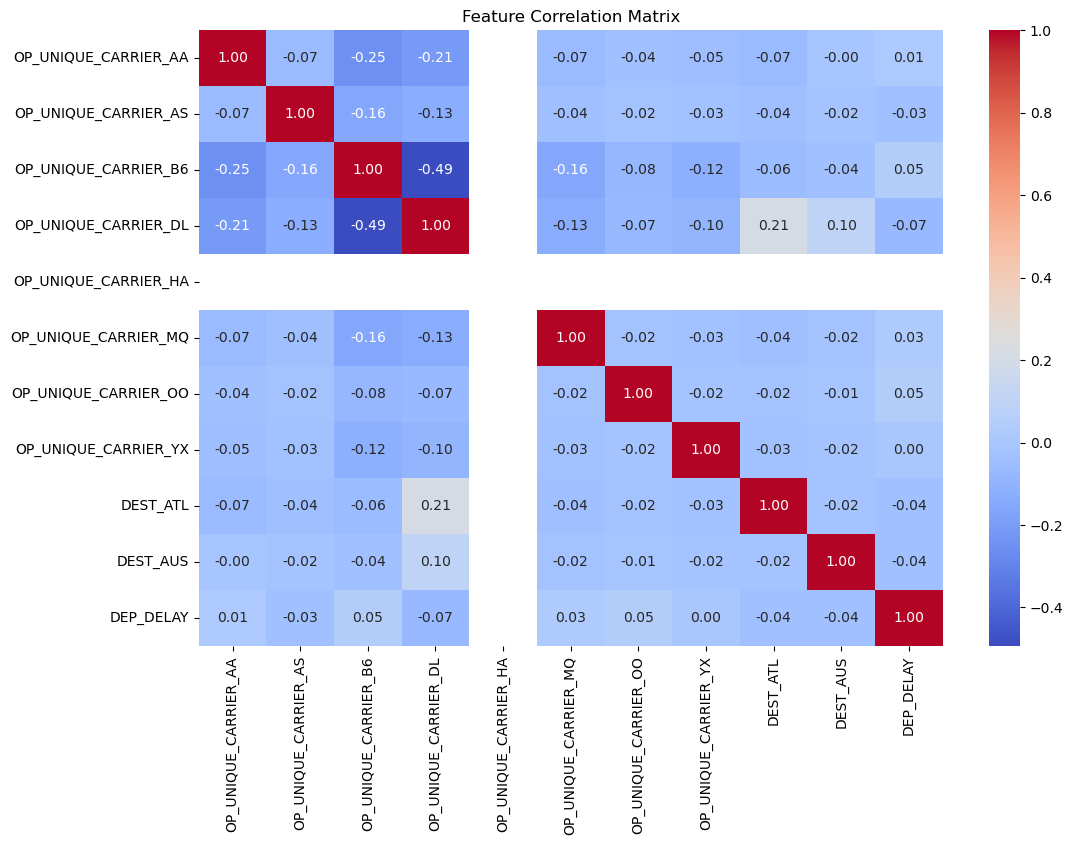

Highly correlated features with target: []


In [14]:
df2 = df[['OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_AS', 'OP_UNIQUE_CARRIER_B6',
       'OP_UNIQUE_CARRIER_DL', 'OP_UNIQUE_CARRIER_HA', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_YX', 'DEST_ATL', 'DEST_AUS', 'DEP_DELAY']]

# Compute Pearson correlation
corr_matrix = df2.corr()

# Visualize correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Selecting highly correlated features (absolute value > 0.7)
threshold = 0.7
high_corr_features = corr_matrix[abs(corr_matrix['DEP_DELAY']) > threshold]['DEP_DELAY'].index.tolist()
high_corr_features.remove('DEP_DELAY')  # Remove the target itself
print("Highly correlated features with target:", high_corr_features)


### Conclusion 

After plotting each feature vs the target variable (DEP_DELAY)), almost all features do not show any correlation